In [85]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## EDA for scraped data for Stony Brook University

### Professor Data

In [86]:
professor_list = pd.read_csv("SchoolID_971.csv")

In [87]:
professor_list.head()

,tDept,tSid,institution_name,tFname,tMiddlename,tLname,tid,tNumRatings,rating_class,contentType,categoryType,overall_rating
0,Geology,971,Stony Brook University (SUNY),Qingyun,NaN,Li,2944135,2,poor,TEACHER,PROFESSOR,2.0
1,Physics,971,Stony Brook University (SUNY),Alexandre G.,NaN,Abanov,837750,11,average,TEACHER,PROFESSOR,3.0
2,Education,971,Stony Brook University (SUNY),Alfred,NaN,Abato,1115249,3,good,TEACHER,PROFESSOR,5.0
3,Nursing,971,Stony Brook University (SUNY),Santina,NaN,Abbate,2459905,1,good,TEACHER,PROFESSOR,5.0
4,Business,971,Stony Brook University (SUNY),Camille,NaN,Abbruscato,921236,49,good,TEACHER,PROFESSOR,4.4


In [88]:
print(professor_list.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3272 entries, 0 to 3271
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tDept             3272 non-null   object 
 1   tSid              3272 non-null   int64  
 2   institution_name  3272 non-null   object 
 3   tFname            3272 non-null   object 
 4   tMiddlename       79 non-null     object 
 5   tLname            3272 non-null   object 
 6   tid               3272 non-null   int64  
 7   tNumRatings       3272 non-null   int64  
 8   rating_class      3272 non-null   object 
 9   contentType       3272 non-null   object 
 10  categoryType      3272 non-null   object 
 11  overall_rating    3272 non-null   float64
dtypes: float64(1), int64(3), object(8)
memory usage: 306.9+ KB
None


### Distribution of Overall Ratings

Visualizing the distribution of ratings can give insight into the general satisfaction with professors across institutions.

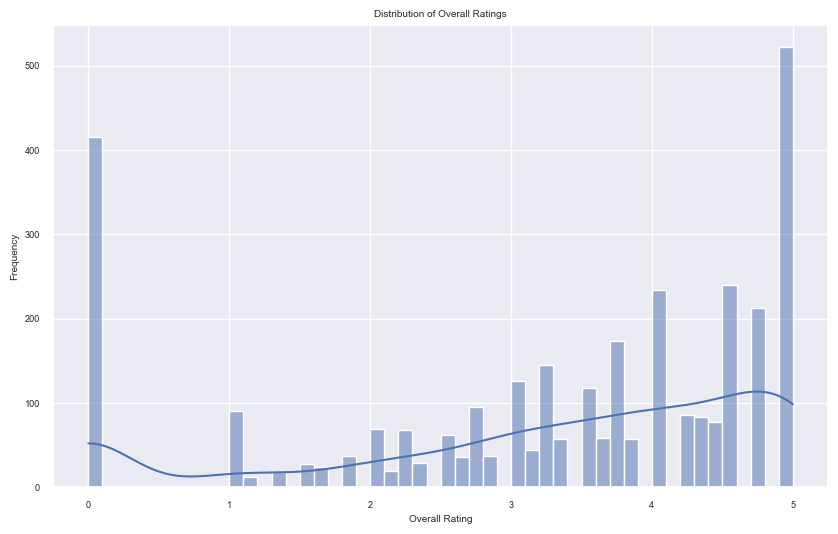

In [89]:
plt.figure(figsize=(10, 6))
sns.histplot(professor_list['overall_rating'], bins=50, kde=True)
plt.title("Distribution of Overall Ratings")
plt.xlabel("Overall Rating")
plt.ylabel("Frequency")
plt.show()

Note: There are some professors who do not have any rating in the website. Dropping these professor data.

In [90]:
# Count the records with overall_rating == 0
count_zero_ratings = professor_list[professor_list['overall_rating'] == 0].shape[0]
print(f"Number of records with 'overall_rating' of 0: {count_zero_ratings}")

# Delete the records with overall_rating == 0
professor_list = professor_list[professor_list['overall_rating'] != 0]

# Confirm deletion
print("Records with 'overall_rating' of 0 have been deleted.")

Number of records with 'overall_rating' of 0: 415
Records with 'overall_rating' of 0 have been deleted.


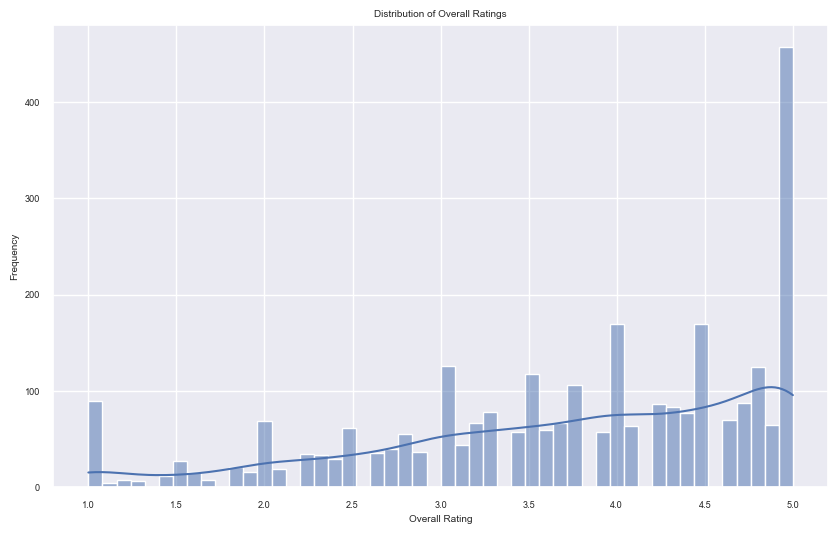

In [91]:
plt.figure(figsize=(10, 6))
sns.histplot(professor_list['overall_rating'], bins=50, kde=True)
plt.title("Distribution of Overall Ratings")
plt.xlabel("Overall Rating")
plt.ylabel("Frequency")
plt.show()

### Average Rating by Department
Understanding which departments have higher ratings can highlight differences in teaching quality across disciplines.

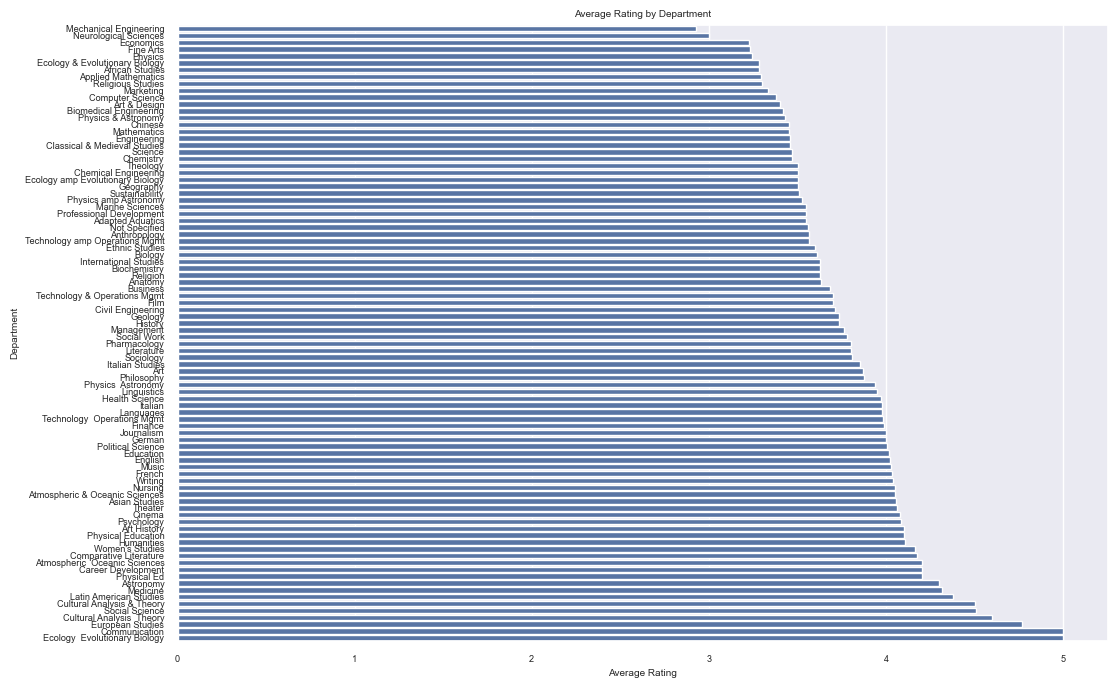

In [92]:
plt.figure(figsize=(12, 8))
department_ratings = professor_list.groupby('tDept')['overall_rating'].mean().sort_values()
sns.barplot(x=department_ratings, y=department_ratings.index)
plt.title("Average Rating by Department")
plt.xlabel("Average Rating")
plt.ylabel("Department")
plt.show()

### Relationship between Number of Ratings and Overall Rating
Analyzing the relationship between tNumRatings and overall_rating can reveal if frequently rated professors have higher or lower ratings.

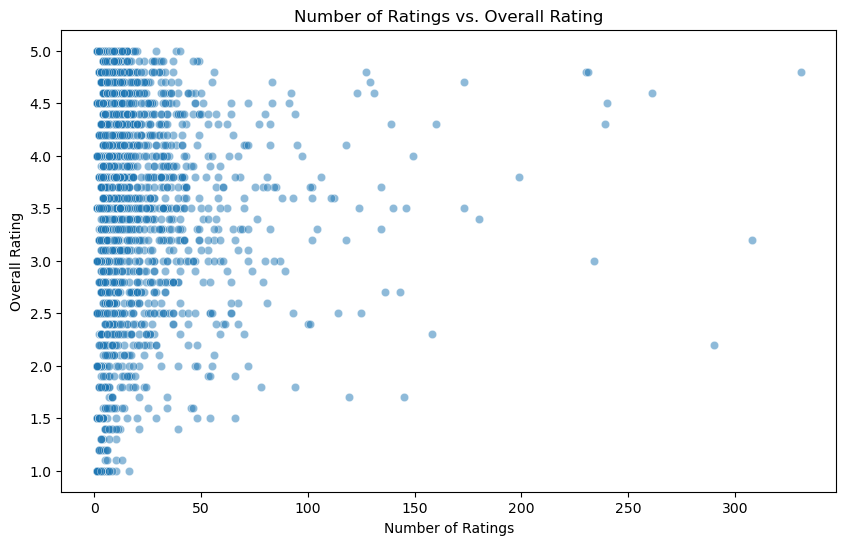

In [50]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=professor_list, x='tNumRatings', y='overall_rating', alpha=0.5)
plt.title("Number of Ratings vs. Overall Rating")
plt.xlabel("Number of Ratings")
plt.ylabel("Overall Rating")
plt.show()


### Distribution of Rating Classes 
(e.g., Excellent, Good, Poor)

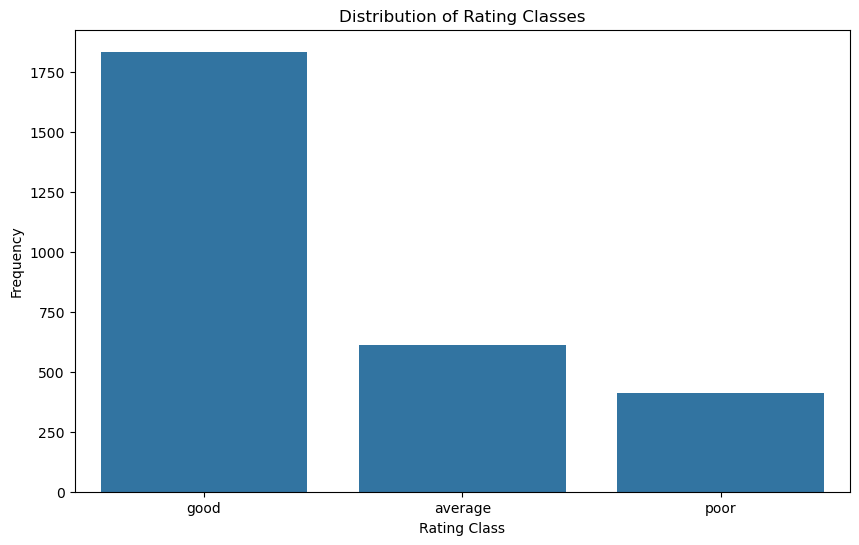

In [51]:
plt.figure(figsize=(10, 6))
sns.countplot(data=professor_list, x='rating_class', order=professor_list['rating_class'].value_counts().index)
plt.title("Distribution of Rating Classes")
plt.xlabel("Rating Class")
plt.ylabel("Frequency")
plt.show()

### Correlation Between Department Size and Average Rating
Examining if larger departments (those with more ratings) tend to have higher or lower average ratings.

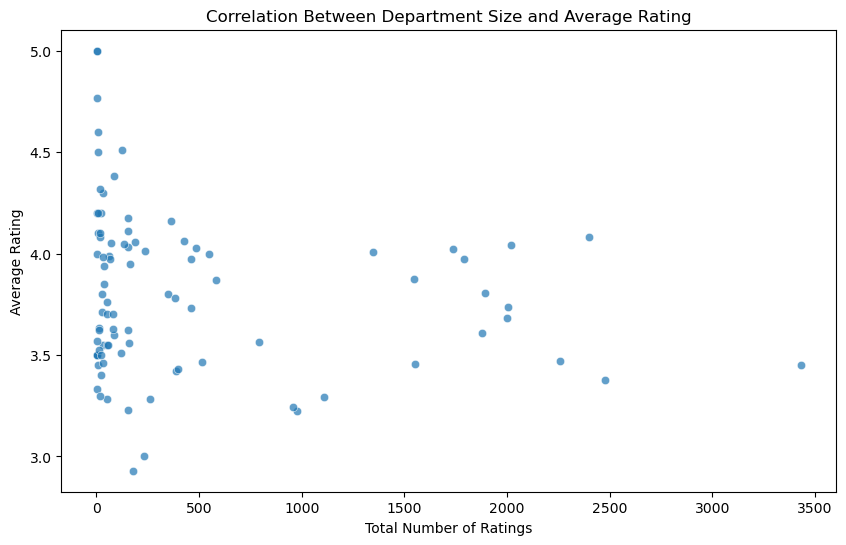

In [52]:
# Calculate average rating and total number of ratings per department
dept_summary = professor_list.groupby('tDept').agg({'overall_rating': 'mean', 'tNumRatings': 'sum'}).reset_index()

# Scatter plot to show correlation
plt.figure(figsize=(10, 6))
sns.scatterplot(data=dept_summary, x='tNumRatings', y='overall_rating', alpha=0.7)
plt.title("Correlation Between Department Size and Average Rating")
plt.xlabel("Total Number of Ratings")
plt.ylabel("Average Rating")
plt.show()


### Heatmap of Ratings by Department and Rating Class
Visualizing the rating class distribution within each department can show if certain departments are more likely to receive particular types of ratings.

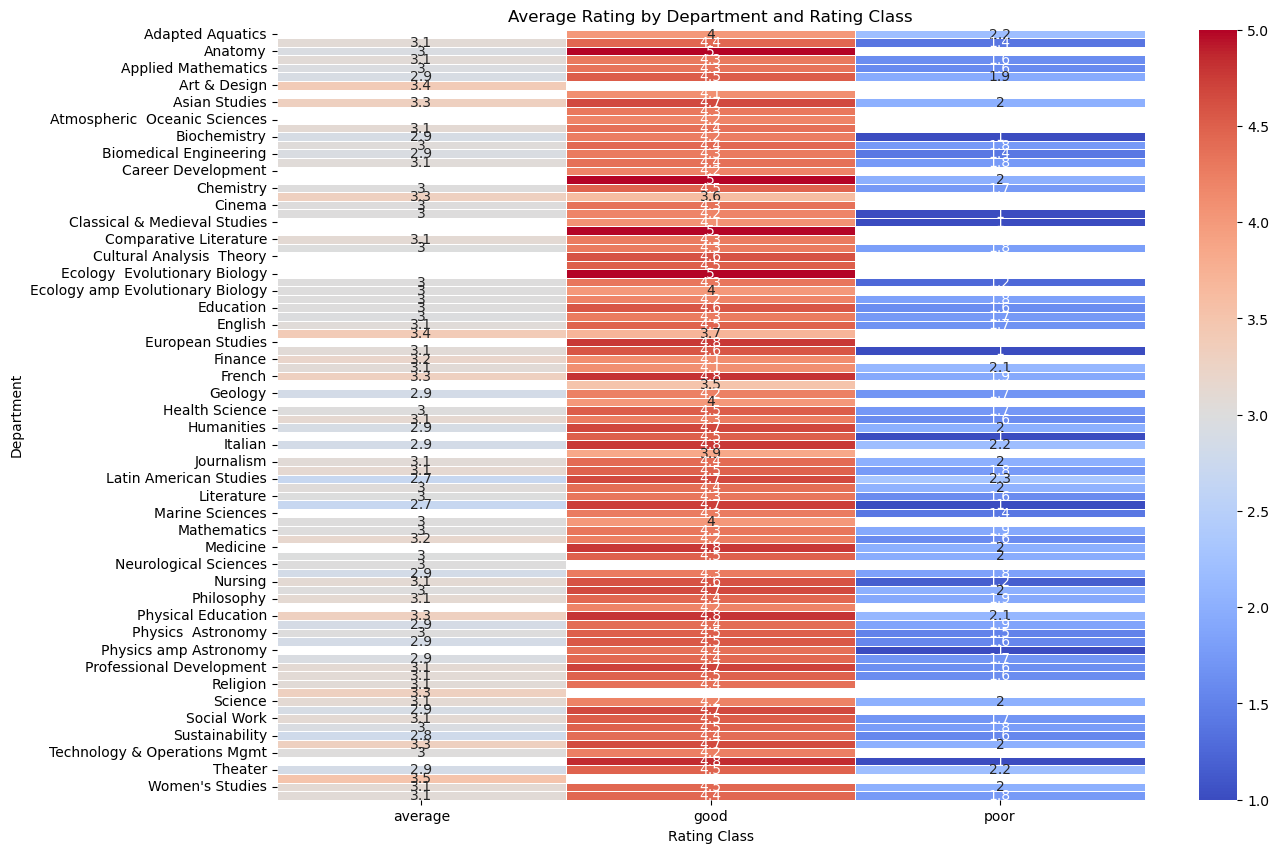

In [53]:
# Pivot table of average ratings by department and rating class
dept_rating_class = professor_list.pivot_table(values='overall_rating', index='tDept', columns='rating_class', aggfunc='mean')

# Plot heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(dept_rating_class, annot=True, cmap="coolwarm", linewidths=.5)
plt.title("Average Rating by Department and Rating Class")
plt.xlabel("Rating Class")
plt.ylabel("Department")
plt.show()

## Reviews Data

In [55]:
review_list = pd.read_csv("SchoolID_971_reviews.csv")

In [56]:
print(review_list.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41947 entries, 0 to 41946
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tid                41947 non-null  int64  
 1   attendance         16070 non-null  object 
 2   clarityColor       41947 non-null  object 
 3   easyColor          41947 non-null  object 
 4   helpColor          41947 non-null  object 
 5   helpCount          41947 non-null  int64  
 6   id                 41947 non-null  int64  
 7   notHelpCount       41947 non-null  int64  
 8   onlineClass        2033 non-null   object 
 9   quality            41947 non-null  object 
 10  rClarity           41947 non-null  int64  
 11  rClass             41947 non-null  object 
 12  rComments          41947 non-null  object 
 13  rDate              41947 non-null  object 
 14  rEasy              41947 non-null  float64
 15  rEasyString        41947 non-null  float64
 16  rErrorMsg          0 n

In [57]:
review_list.head()

,tid,attendance,clarityColor,easyColor,helpColor,helpCount,id,notHelpCount,onlineClass,quality,...,rTextBookUse,rTimestamp,rWouldTakeAgain,sId,takenForCredit,teacher,teacherGrade,teacherRatingTags,unUsefulGrouping,usefulGrouping
0,2944135,Mandatory,average,good,average,1,38400544,0,NaN,poor,...,NaN,1702350700000,NaN,971,Yes,NaN,NaN,"['Beware of pop quizzes', 'Graded by few thing...",people,person
1,2944135,Not Mandatory,average,average,average,1,38335989,0,NaN,poor,...,NaN,1698971904000,NaN,971,Yes,NaN,NaN,"['Test heavy', 'Clear grading criteria']",people,person
2,837750,NaN,good,average,good,0,16032157,0,NaN,awesome,...,Yes,1247346738000,NaN,971,NaN,NaN,NaN,[],people,people
3,837750,NaN,good,average,good,0,12876674,0,NaN,good,...,Yes,1172080668000,NaN,971,NaN,NaN,NaN,[],people,people
4,837750,NaN,average,average,average,0,12698289,0,NaN,average,...,Yes,1167430334000,NaN,971,NaN,NaN,NaN,[],people,people


### Rating Distribution by Grade
To see more detailed information, you can also use a box plot, which shows the distribution of ratings for each grade.

In [58]:
# Filter out records with missing values in 'teacherGrade' or 'quality'
df_filtered = review_list.dropna(subset=['teacherGrade', 'rOverall'])

/var/folders/j3/1tqsh61545z4hkn9_8qq3nzr0000gn/T/ipykernel_80598/1884804914.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=grade_ratings.index, y=grade_ratings.values, palette="coolwarm")


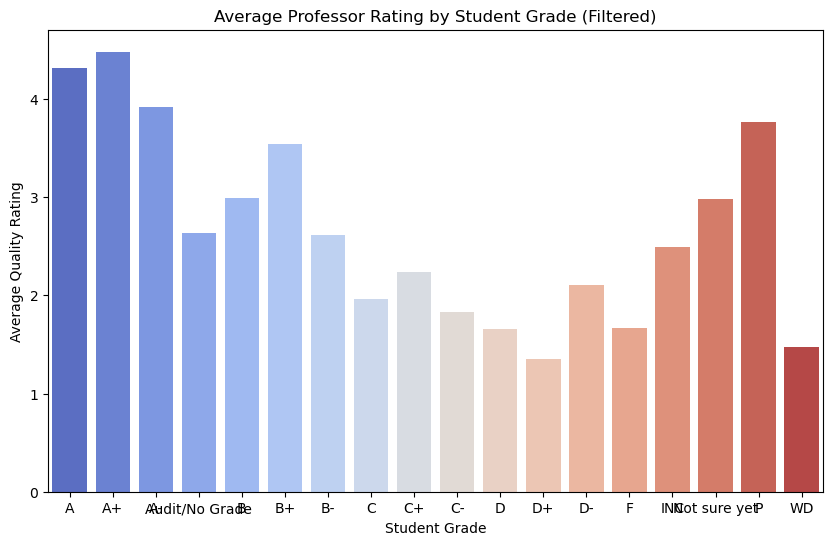

In [59]:
# Calculate the average rating for each grade
grade_ratings = df_filtered.groupby('teacherGrade')['rOverall'].mean().sort_index()

# Plot the average rating for each grade
plt.figure(figsize=(10, 6))
sns.barplot(x=grade_ratings.index, y=grade_ratings.values, palette="coolwarm")
plt.title("Average Professor Rating by Student Grade (Filtered)")
plt.xlabel("Student Grade")
plt.ylabel("Average Quality Rating")
plt.show()

The investigation resulted in showing that students who perform good in the class tend to rate the professor higher than the ones who do not do this.

## Combining two datasets

In [63]:
df_combined = pd.merge(professor_list, review_list, left_on='tid', right_on='tid')
df_school = df_combined

In [67]:
df_school.shape

(41888, 43)

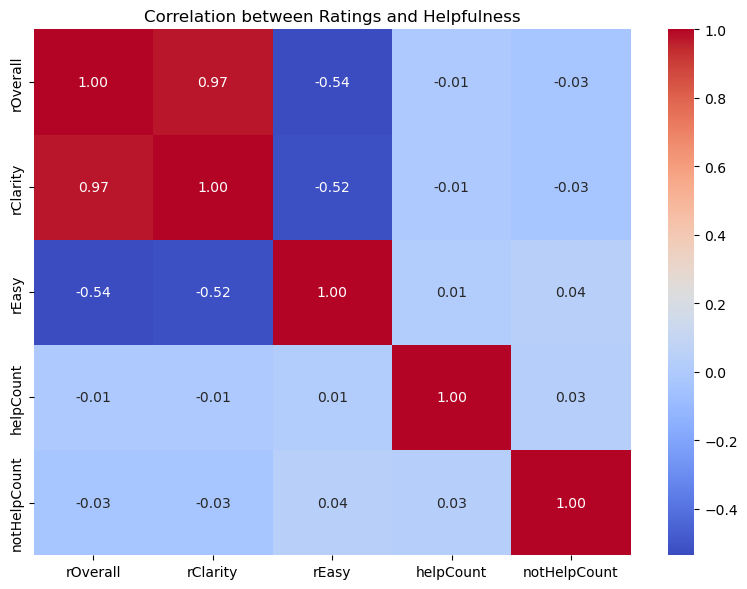

In [74]:
# Merge professor and reviews data on tid
merged_df = pd.merge(review_list, professor_list[['tid', 'institution_name', 'tDept']], on='tid')

# Calculate correlations between ratings and helpfulness
corr_data = merged_df[['rOverall', 'rClarity', 'rEasy', 'helpCount', 'notHelpCount']].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_data, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation between Ratings and Helpfulness')
plt.tight_layout()
plt.show()

/var/folders/j3/1tqsh61545z4hkn9_8qq3nzr0000gn/T/ipykernel_80598/1888816336.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=take_again_rate.index, y=take_again_rate.values, palette="muted")


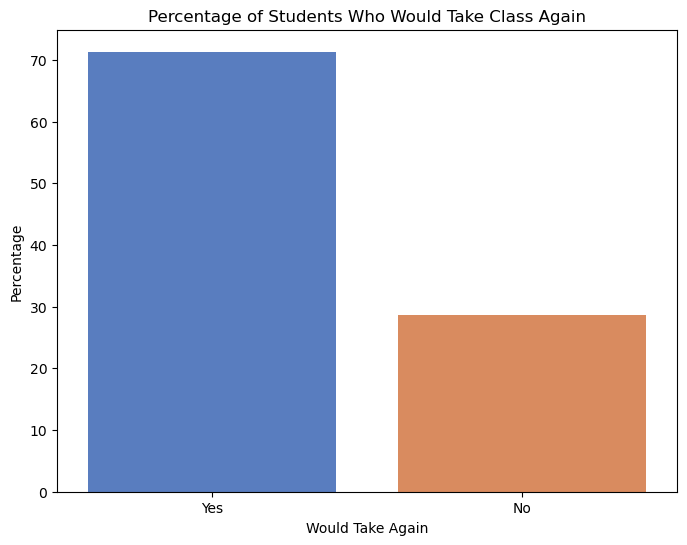

In [69]:
take_again_rate = df_school['rWouldTakeAgain'].value_counts(normalize=True) * 100

plt.figure(figsize=(8, 6))
sns.barplot(x=take_again_rate.index, y=take_again_rate.values, palette="muted")
plt.title("Percentage of Students Who Would Take Class Again")
plt.xlabel("Would Take Again")
plt.ylabel("Percentage")
plt.show()
